# Import Dataset & Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Ignore warning messages
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("hr_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [15]:
df.shape

(287, 25)

In [16]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
229,kindEland7,105293,Belum_menikah,Wanita,FullTime,Data Analyst,Mid_level,Sangat_bagus,Jakarta Barat,Indeed,4,5.0,0.0,0.0,15.0,+6289783478xxx,kindEland7431@hotmail.com,Sarjana,1,NaN,masih_bekerja,1988-09-27,2008-01-07,2020-01-03,-
12,yearningBagels0,100895,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,4,3.0,0.0,0.0,50.0,+6287794061xxx,yearningBagels0311@outlook.com,Magister,1,NaN,masih_bekerja,1988-08-10,2013-11-11,2020-01-08,-
241,chicPlover7,111572,Bercerai,Wanita,Outsource,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Diversity_Job_Fair,2,4.0,4.0,0.0,17.0,+6281366582xxx,chicPlover7178@hotmail.com,Sarjana,1,NaN,NaN,1987-06-14,2011-9-26,2014-8-15,-
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5.0,0.0,0.0,17.0,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,1.0,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08
163,forsakenSalt3,100468,Bercerai,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Utara,LinkedIn,4,3.0,0.0,0.0,14.0,+6281288888xxx,forsakenSalt3729@proton.com,Sarjana,1,NaN,tidak_bisa_remote,1983-02-02,2014-3-31,2020-02-01,2020-8-19


There are 25 columns with 287 rows in the dataset. Some columns, such as `EmployeeSatisfactionScore`, `ProjectParticipationCount`, `LateCountLastMonth`, `AbsenteeismCount`, `LOPProgramParticipation`, and `ResignationReason`, have missing values. Therefore, we will address these missing values first before proceeding to the modeling process.

# Custom Functions

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.compose import ColumnTransformer

# ==== Get Classifiers ====
def get_classifiers():
    models = [
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(n_jobs=-1),
        DecisionTreeClassifier(random_state=42),
        RandomForestClassifier(random_state=42, n_jobs=-1),
        ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        GradientBoostingClassifier(random_state=42),
        AdaBoostClassifier(random_state=42),
        XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1),
        LGBMClassifier(random_state=42),
        SVC(probability=True, random_state=42),
        MLPClassifier(max_iter=500, random_state=42),
        RidgeClassifier(random_state=42),
        PassiveAggressiveClassifier(random_state=42),
        CatBoostClassifier(verbose=0, random_state=42)
    ]

    names = [
        'LogReg', 'KNN', 'DecisionTree', 'RandomForest', 'ExtraTrees',
        'GradientBoost', 'AdaBoost', 'XGBoost', 'LightGBM',
        'SVM', 'MLP', 'Ridge', 'PA', 'CatBoost'
    ]

    return models, names

# ==== Evaluation Function ====
def evaluate_classifiers(X, y, preprocessor, models, names, sampler=None, sort_by='F2-score (mean)'):
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    results = {}
    metric_scores = {
        'f2_score': [],
        'f1_score': [],
        'precision': [],
        'recall': [],
        'roc_auc': []
    }

    for model, name in zip(models, names):
        steps = [('preprocessor', preprocessor)]
        if sampler:
            steps.append(('sampler', sampler))
        steps.append(('classifier', model))

        pipeline = ImbPipeline(steps)

        scores = {
            'Recall': cross_val_score(pipeline, X, y, scoring='recall', cv=rskf, n_jobs=-1, error_score='raise'),
            'Precision': cross_val_score(pipeline, X, y, scoring='precision', cv=rskf, n_jobs=-1, error_score='raise'),
            'F1-Score': cross_val_score(pipeline, X, y, scoring='f1', cv=rskf, n_jobs=-1, error_score='raise'),
            'F2-Score': cross_val_score(pipeline, X, y, scoring=make_scorer(fbeta_score, beta=2, pos_label=1), cv=rskf, n_jobs=-1, error_score='raise'),
            'ROC-AUC': cross_val_score(pipeline, X, y, scoring='roc_auc', cv=rskf, n_jobs=-1, error_score='raise')
        }

        results[name] = {
            'F1-score (mean)': round(np.mean(scores['F1-Score']), 4),
            'F2-score (mean)': round(np.mean(scores['F2-Score']), 4),
            'Precision (mean)': round(np.mean(scores['Precision']), 4),
            'Recall (mean)': round(np.mean(scores['Recall']), 4),
            'ROC-AUC (mean)': round(np.mean(scores['ROC-AUC']), 4),
        }

        for metric_key, metric_val in zip(metric_scores.keys(), scores.values()):
            metric_scores[metric_key].append(metric_val)

        print(f"> {name} | "
              f"F1: {results[name]['F1-score (mean)']} | "
              f"F2: {results[name]['F2-score (mean)']} | "
              f"Precision: {results[name]['Precision (mean)']} | "
              f"Recall: {results[name]['Recall (mean)']} | "
              f"ROC-AUC: {results[name]['ROC-AUC (mean)']}")

    # Convert results to DataFrame
    df_results = pd.DataFrame(results).T.sort_values(by=sort_by, ascending=False)

    return results, df_results, metric_scores

In [18]:
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE

def rfe_fe(df, pipeline, scoring='accuracy', target='target'):
    # Extract features (X) and target (y) from the dataframe
    X = df.drop(columns=target)
    y = df[target]
    
    # Evaluate the models by selecting different numbers of features
    models = dict()
    num_input_features = X.columns.shape[0]
    for i in range(0, num_input_features):
        # Modify the pipeline by changing the number of features to select
        pipeline.set_params(s__n_features_to_select=i)  # Update RFE step in pipeline with i features
        models[str(i)] = pipeline

    # Evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y, scoring)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # Plot model performance for comparison
    plt.boxplot(results, tick_labels=names, showmeans=True)
    plt.show()

def evaluate_model(model, X, y, scoring):
    # Repeated Stratified K-Fold cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if scoring == 'f2':
        scoring = make_scorer(fbeta_score, beta=2, pos_label=1)
    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    return scores

In [19]:
from typing import List, Optional, Dict, Any, Union
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import (
    SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN, KMeansSMOTE, RandomOverSampler
)
from imblearn.under_sampling import (
    RandomUnderSampler, TomekLinks, EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours, AllKNN, NeighbourhoodCleaningRule,
    InstanceHardnessThreshold, ClusterCentroids
)
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
import numpy as np
import pandas as pd

# === Data Sampling & Preprocessing ===
def get_sampling_pipelines_with_preprocessing(
    model: BaseEstimator,
    preprocessor,
    custom_samplers: Optional[Dict[str, Any]] = None
):

    # Define sampling methods
    sampling_methods = {
        'No Sampling': None,
        'RandomOverSampler': RandomOverSampler(random_state=42),
        'SMOTE': SMOTE(random_state=42),
        'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
        'SVMSMOTE': SVMSMOTE(random_state=42),
        'RandomUnderSampler': RandomUnderSampler(random_state=42),
        'TomekLinks': TomekLinks(),
        'EditedNearestNeighbours': EditedNearestNeighbours(),
        'RepeatedEditedNearestNeighbours': RepeatedEditedNearestNeighbours(),
        'AllKNN': AllKNN(),
        'NeighbourhoodCleaningRule': NeighbourhoodCleaningRule(),
        'InstanceHardnessThreshold': InstanceHardnessThreshold(),
        'SMOTEENN': SMOTEENN(random_state=42),
        'SMOTETomek': SMOTETomek(random_state=42)
    }

    pipelines, names = [], []

    for name, sampler in sampling_methods.items():
        if sampler:
            pipeline = ImbPipeline([
                ('preprocessor', preprocessor),
                ('sampler', sampler),
                ('classifier', model)
            ])
        else:
            pipeline = ImbPipeline([
                ('preprocessor', preprocessor),
                ('classifier', model)
            ])
        pipelines.append(pipeline)
        names.append(name)

    return pipelines, names

# === Evaluate Model with SMOTE ===
def evaluate_classifier_with_sampling(
    X,
    y,
    pipeline,
    scoring: Union[str, List[str]] = 'f1',
    cv_splits: int = 10,
    sort_scoring='f1'
) -> pd.DataFrame:
    if isinstance(scoring, str):
        scoring = [scoring]

    # Define custom scorers if needed
    scoring_dict = {}
    for score in scoring:
        if score == 'f2':
            scoring_dict['f2'] = make_scorer(fbeta_score, beta=2, pos_label=1)
        else:
            scoring_dict[score] = score
    
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    scores = cross_validate(
        pipeline,
        X, y,
        scoring=scoring_dict,
        cv=skf,
        return_train_score=False
    )
    
    # Extract test scores only
    test_scores = {
        metric.replace("test_", ""): values
        for metric, values in scores.items()
        if metric.startswith("test_")
    }
    
    # Create DataFrame of raw scores
    df_scores = pd.DataFrame(test_scores)
    
    # Summarize mean ± std
    summary = {
        metric: f"{df_scores[metric].mean():.3f} ± {df_scores[metric].std():.3f}"
        for metric in df_scores.columns
    }
    
    # Convert summary dictionary to DataFrame
    summary_df = pd.DataFrame([summary])
    
    # Ensure that sort_scoring exists in the columns
    if sort_scoring not in summary_df.columns:
        raise ValueError(f"sort_scoring '{sort_scoring}' not found in the scoring metrics. Available metrics: {list(summary_df.columns)}")
    
    # Sort by the selected scoring metric
    return summary_df.sort_values(by=sort_scoring, ascending=False)

# Data Cleaning for EDA

## Handle Missing Values

In [20]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [21]:
df.isnull().sum() / df.shape[0] * 100

Username                               0.000000
EnterpriseID                           0.000000
StatusPernikahan                       0.000000
JenisKelamin                           0.000000
StatusKepegawaian                      0.000000
Pekerjaan                              0.000000
JenjangKarir                           0.000000
PerformancePegawai                     0.000000
AsalDaerah                             0.000000
HiringPlatform                         0.000000
SkorSurveyEngagement                   0.000000
SkorKepuasanPegawai                    1.742160
JumlahKeikutsertaanProjek              1.045296
JumlahKeterlambatanSebulanTerakhir     0.348432
JumlahKetidakhadiran                   2.090592
NomorHP                                0.000000
Email                                  0.000000
TingkatPendidikan                      0.000000
PernahBekerja                          0.000000
IkutProgramLOP                        89.895470
AlasanResign                          22

The `LOPProgramParticipation` column contains 90% missing values and will therefore be removed from the dataset. Meanwhile, other columns with fewer missing values, such as `EmployeeSatisfactionScore`, `ProjectParticipationCount`, `LateCountLastMonth`, and `AbsenteeismCount`, will be imputed using statistical values.

In [22]:
df[['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']].skew()

SkorKepuasanPegawai                  -0.260698
JumlahKeikutsertaanProjek             1.556362
JumlahKeterlambatanSebulanTerakhir    3.127227
JumlahKetidakhadiran                  1.575921
dtype: float64

Missing values in the `EmployeeSatisfactionScore` column will be imputed using the mode (the most frequently occurring value) because this column is categorical. For missing values in the `ResignationReason` column, they will be imputed with the value 'Unknown'. Meanwhile, for the columns `ProjectParticipationCount`, `LateCountLastMonth`, and `AbsenteeismCount`, imputation will be performed using the median value of each respective column, as these three columns have non-normal or skewed data distributions.

In [23]:
# drop IkutProgramLOP
df.drop('IkutProgramLOP', axis=1, inplace=True)

# imputation
imputations = {
    'AlasanResign': 'Unknown',
    'SkorKepuasanPegawai': df['SkorKepuasanPegawai'].mode()[0],
    'JumlahKeikutsertaanProjek': df['JumlahKeikutsertaanProjek'].median(),
    'JumlahKeterlambatanSebulanTerakhir': df['JumlahKeterlambatanSebulanTerakhir'].median(),
    'JumlahKetidakhadiran': df['JumlahKetidakhadiran'].median()
}

df.fillna(imputations, inplace=True)

In [24]:
# Check again
df.isnull().sum() / df.shape[0] * 100

Username                              0.0
EnterpriseID                          0.0
StatusPernikahan                      0.0
JenisKelamin                          0.0
StatusKepegawaian                     0.0
Pekerjaan                             0.0
JenjangKarir                          0.0
PerformancePegawai                    0.0
AsalDaerah                            0.0
HiringPlatform                        0.0
SkorSurveyEngagement                  0.0
SkorKepuasanPegawai                   0.0
JumlahKeikutsertaanProjek             0.0
JumlahKeterlambatanSebulanTerakhir    0.0
JumlahKetidakhadiran                  0.0
NomorHP                               0.0
Email                                 0.0
TingkatPendidikan                     0.0
PernahBekerja                         0.0
AlasanResign                          0.0
TanggalLahir                          0.0
TanggalHiring                         0.0
TanggalPenilaianKaryawan              0.0
TanggalResign                     

## Check Duplicates

In [25]:
# Check
df.duplicated().sum()

np.int64(0)

There are no duplicate rows in the dataset, so we will proceed to the next step.

## Check Statistics

In [26]:
df.describe(include='all')

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287.000000,287,287,287,287,287,287,287,287,287.000000,287.000000,287.000000,287.000000,287.000000,287,287,287,287,287,287,287,287,287
unique,285,NaN,5,2,3,14,3,5,5,9,NaN,NaN,NaN,NaN,NaN,287,287,3,2,12,284,97,127,53
top,brainyMagpie7,NaN,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,NaN,NaN,NaN,NaN,NaN,+6287722818xxx,puzzledFish5776@hotmail.com,Sarjana,1,masih_bekerja,1984-07-07,2011-01-10,2020-1-14,-
freq,2,NaN,132,167,217,109,169,85,72,85,NaN,NaN,NaN,NaN,NaN,1,1,176,286,132,2,12,17,198
mean,NaN,105923.324042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.101045,3.888502,1.167247,0.411150,10.439024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4044.977599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.836388,0.913060,2.285537,1.273018,6.829769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,100282.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,101269.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,106069.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,0.000000,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,110514.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,0.000000,0.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
categorical_cols = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 
                    'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 
                    'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan',
                   'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'PernahBekerja',
                   'AlasanResign']
numerical_cols = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
date_cols = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']

In [28]:
for col in categorical_cols:
    print(f"{col}: {len(df[col].unique())} - {df[col].unique()}\nValue Counts - {df[col].value_counts()}\n\n")

StatusPernikahan: 5 - ['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya' '-']
Value Counts - StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64


JenisKelamin: 2 - ['Pria' 'Wanita']
Value Counts - JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64


StatusKepegawaian: 3 - ['Outsource' 'FullTime' 'Internship']
Value Counts - StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64


Pekerjaan: 14 - ['Software Engineer (Back End)' 'Data Analyst'
 'Software Engineer (Front End)' 'Product Manager'
 'Software Engineer (Android)' 'Scrum Master'
 'Product Design (UX Researcher)' 'Product Design (UI & UX)'
 'Digital Product Manager' 'Data Engineer' 'Software Engineer (iOS)'
 'DevOps Engineer' 'Software Architect' 'Machine Learning Engineer']
Value Counts - Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Soft

One of the categories in the `WorkExperience` column contains only a single value, so this column will be removed from the dataset. Additionally, the `-` category in the `MaritalStatus` column will be merged with the `Other` category, as both values essentially carry the same meaning.

In [29]:
# drop PernahBekerja
df.drop('PernahBekerja', axis=1, inplace=True)

# replace '-' dengan nilai 'Lainnya' pada kolom StatusPernikahan
df['StatusPernikahan'] = df['StatusPernikahan'].replace({'-': 'Lainnya'})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

# EDA

## Annual Report on Employee Number Changes

In [31]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
266,dreadfulBobolink0,111680,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Other,3,4.0,0.0,0.0,15.0,+6289697234xxx,dreadfulBobolink0484@proton.com,Magister,Unknown,1975-09-16,2007-6-25,2011-7-14,-
79,excludedTeal8,100942,Lainnya,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Utara,LinkedIn,3,4.0,0.0,0.0,4.0,+6283218201xxx,excludedTeal8756@gmail.com,Sarjana,masih_bekerja,1986-06-10,2012-2-20,2020-01-07,-
29,grizzledFlamingo9,106473,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Biasa,Jakarta Utara,LinkedIn,4,3.0,7.0,0.0,10.0,+6289673952xxx,grizzledFlamingo9139@proton.com,Doktor,masih_bekerja,1973-05-27,2015-01-05,2019-2-13,-
112,joyfulVenison6,101389,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Mid_level,Sangat_bagus,Jakarta Utara,Google_Search,3,3.0,0.0,0.0,15.0,+6283227259xxx,joyfulVenison6060@gmail.com,Sarjana,ganti_karir,1981-11-23,2007-11-05,2020-2-25,2013-5-30
127,scornfulDove3,101662,Lainnya,Wanita,FullTime,Data Engineer,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Google_Search,4,3.0,0.0,0.0,3.0,+6285710367xxx,scornfulDove3185@gmail.com,Sarjana,jam_kerja,1953-05-24,2011-5-16,2018-4-18,2015-6-18


In [32]:
# Mengkonversi kolom tanggal menjadi tipe datetime
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

# Ekstrak tahun dari tanggal hiring dan resign
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year

# Tabel Jumlah karyawan masuk berdasarkan tahun hiring
hiring_count = df.groupby('TahunHiring').size().reset_index(name='JumlahMasuk')

# Tabel jumlah karyawan keluar berdasarkan tahun resign
resign_count = df.groupby('TahunResign').size().reset_index(name='JumlahKeluar')

In [33]:
hiring_count

,TahunHiring,JumlahMasuk
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [34]:
resign_count

,TahunResign,JumlahKeluar
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


In [35]:
# Outer join berdasarkan tahun hiring dan resign
merged = pd.merge(hiring_count, resign_count, left_on='TahunHiring', right_on='TahunResign', how='outer')

# Menggabungkan nilai dari kolom 'TahunHiring' dan 'TahunResign', dan menghilangkan NaN
merged['Tahun'] = merged[['TahunHiring', 'TahunResign']].bfill(axis=1).iloc[:, 0]

# Imputasi nilai kosong dengan 0
merged['JumlahMasuk'] = merged['JumlahMasuk'].fillna(0)
merged['JumlahKeluar'] = merged['JumlahKeluar'].fillna(0)

In [36]:
merged

,TahunHiring,JumlahMasuk,TahunResign,JumlahKeluar,Tahun
0,2006.0,1.0,NaN,0.0,2006.0
1,2007.0,2.0,NaN,0.0,2007.0
2,2008.0,2.0,NaN,0.0,2008.0
3,2009.0,7.0,NaN,0.0,2009.0
4,2010.0,8.0,NaN,0.0,2010.0
5,2011.0,76.0,NaN,0.0,2011.0
6,2012.0,41.0,NaN,0.0,2012.0
7,2013.0,43.0,2013.0,5.0,2013.0
8,2014.0,56.0,2014.0,12.0,2014.0
9,2015.0,31.0,2015.0,8.0,2015.0


In [37]:
# Menambahkan kolom total karyawan yang bertahan
merged['KaryawanBertahan'] = merged['JumlahMasuk'] - merged['JumlahKeluar']

# Menambahan kolom perubahan karyawan (berdasarkan perubahan antara jumlah masuk dan keluar)
merged['PerubahanKaryawan'] = merged['JumlahMasuk'] - merged['JumlahKeluar']

In [38]:
merged

,TahunHiring,JumlahMasuk,TahunResign,JumlahKeluar,Tahun,KaryawanBertahan,PerubahanKaryawan
0,2006.0,1.0,NaN,0.0,2006.0,1.0,1.0
1,2007.0,2.0,NaN,0.0,2007.0,2.0,2.0
2,2008.0,2.0,NaN,0.0,2008.0,2.0,2.0
3,2009.0,7.0,NaN,0.0,2009.0,7.0,7.0
4,2010.0,8.0,NaN,0.0,2010.0,8.0,8.0
5,2011.0,76.0,NaN,0.0,2011.0,76.0,76.0
6,2012.0,41.0,NaN,0.0,2012.0,41.0,41.0
7,2013.0,43.0,2013.0,5.0,2013.0,38.0,38.0
8,2014.0,56.0,2014.0,12.0,2014.0,44.0,44.0
9,2015.0,31.0,2015.0,8.0,2015.0,23.0,23.0


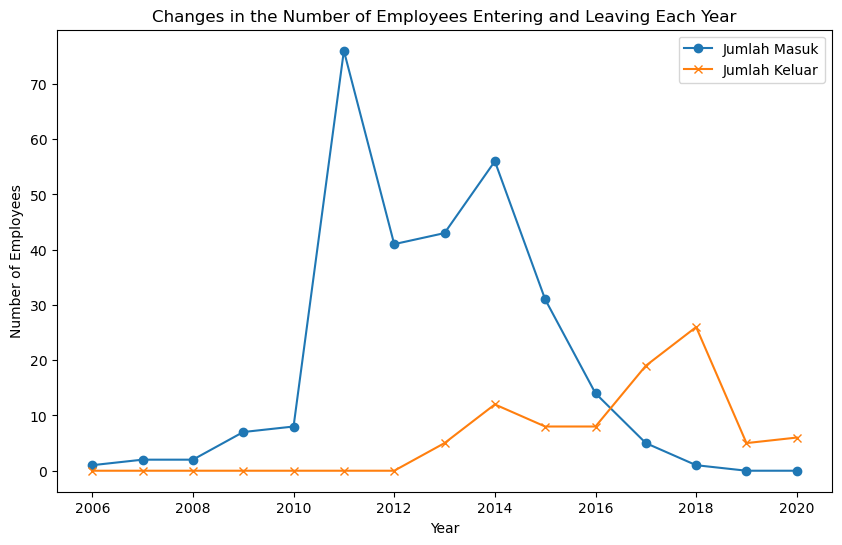

In [40]:
import matplotlib.pyplot as plt

# Plot perubahan jumlah karyawan masuk dan keluar setiap tahun
plt.figure(figsize=(10,6))
plt.plot(merged['Tahun'], merged['JumlahMasuk'], label='Jumlah Masuk', marker='o')
plt.plot(merged['Tahun'], merged['JumlahKeluar'], label='Jumlah Keluar', marker='x')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Changes in the Number of Employees Entering and Leaving Each Year')
plt.legend()
plt.grid(False)
plt.show()

Based on the results of this plot, we can observe the trend of employee inflow and outflow over the years. From 2006 to 2016, it is evident that the number of employees joining the company consistently exceeded those leaving, indicating positive growth in employee numbers during that period. However, starting from 2017 onwards, we can see a crossover point between the number of incoming and outgoing employees. In 2017, for instance, more employees left (19 people) than joined (5 people). This suggests that the company began facing difficulties in retaining employees, which could be an indication of issues related to work culture, management, or other external factors affecting employee retention rates.


## Resign Reason Analysis for Employee Attrition Management Strategy

In [41]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
226,culturedMandrill6,100709,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Utara,Indeed,1,5.0,4.0,4.0,19.0,+6282293404xxx,culturedMandrill6815@yahoo.com,Sarjana,Unknown,1987-05-15,2011-05-02,2013-08-10,NaT,2011,NaN
139,gleefulKitten1,106347,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Google_Search,3,5.0,0.0,4.0,15.0,+6287713961xxx,gleefulKitten1142@outlook.com,Sarjana,masih_bekerja,1988-03-17,2011-01-10,2018-04-06,NaT,2011,NaN
27,pluckyApples4,110566,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,LinkedIn,3,5.0,0.0,0.0,15.0,+6281988935xxx,pluckyApples4880@icloud.com,Sarjana,Product Design (UI & UX),1987-04-10,2016-07-06,2020-1-28,2016-08-07,2016,2016.0
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,2,5.0,5.0,0.0,9.0,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,internal_conflict,1986-09-01,2014-09-29,2020-1-18,2019-06-06,2014,2019.0
61,puzzledBagels7,101053,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Mid_level,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,5.0,0.0,0.0,20.0,+6281967947xxx,puzzledBagels7691@hotmail.com,Sarjana,masih_bekerja,1969-02-24,2011-03-07,2020-1-17,NaT,2011,NaN


In [42]:
# Membuat Dua DataFrame Terpisah Berdasarkan Status Resign
# resign employees
df_resign = df[df['TahunResign'].notnull()]

# not resign employees
df_not_resign = df[df['TahunResign'].isnull()]

# agregasi berdasarkan pekerjaan
df_resign_aggr = df_resign.groupby('Pekerjaan').size().reset_index(name='JumlahResign')
df_not_resign_aggr = df_not_resign.groupby('Pekerjaan').size().reset_index(name='JumlahNotResign')

print(df_resign_aggr)
print(df_not_resign_aggr)

                       Pekerjaan  JumlahResign
0                   Data Analyst             8
1                  Data Engineer             3
2       Product Design (UI & UX)             9
3                Product Manager             6
4    Software Engineer (Android)             7
5   Software Engineer (Back End)            28
6  Software Engineer (Front End)            28
                         Pekerjaan  JumlahNotResign
0                     Data Analyst                8
1                    Data Engineer                7
2                  DevOps Engineer                3
3          Digital Product Manager                2
4        Machine Learning Engineer                2
5         Product Design (UI & UX)               15
6   Product Design (UX Researcher)                1
7                  Product Manager               11
8                     Scrum Master                3
9               Software Architect                1
10     Software Engineer (Android)               17


In [43]:
# Menggabungkan Kedua DataFrame Berdasarkan Key Pekerjaan
# menggabungkan dengan outer join
df_aggregated = pd.merge(df_not_resign_aggr, df_resign_aggr, on='Pekerjaan', how='outer').fillna(0)

# menambahkan kolom total employee dan presentase yang masih ada
df_aggregated['TotalEmployee'] = df_aggregated['JumlahNotResign'] + df_aggregated['JumlahResign']
df_aggregated['PresentaseNotResign'] = df_aggregated['JumlahNotResign'] / df_aggregated['TotalEmployee'] * 100

df_aggregated

,Pekerjaan,JumlahNotResign,JumlahResign,TotalEmployee,PresentaseNotResign
0,Data Analyst,8,8.0,16.0,50.000000
1,Data Engineer,7,3.0,10.0,70.000000
2,DevOps Engineer,3,0.0,3.0,100.000000
3,Digital Product Manager,2,0.0,2.0,100.000000
4,Machine Learning Engineer,2,0.0,2.0,100.000000
5,Product Design (UI & UX),15,9.0,24.0,62.500000
6,Product Design (UX Researcher),1,0.0,1.0,100.000000
7,Product Manager,11,6.0,17.0,64.705882
8,Scrum Master,3,0.0,3.0,100.000000
9,Software Architect,1,0.0,1.0,100.000000


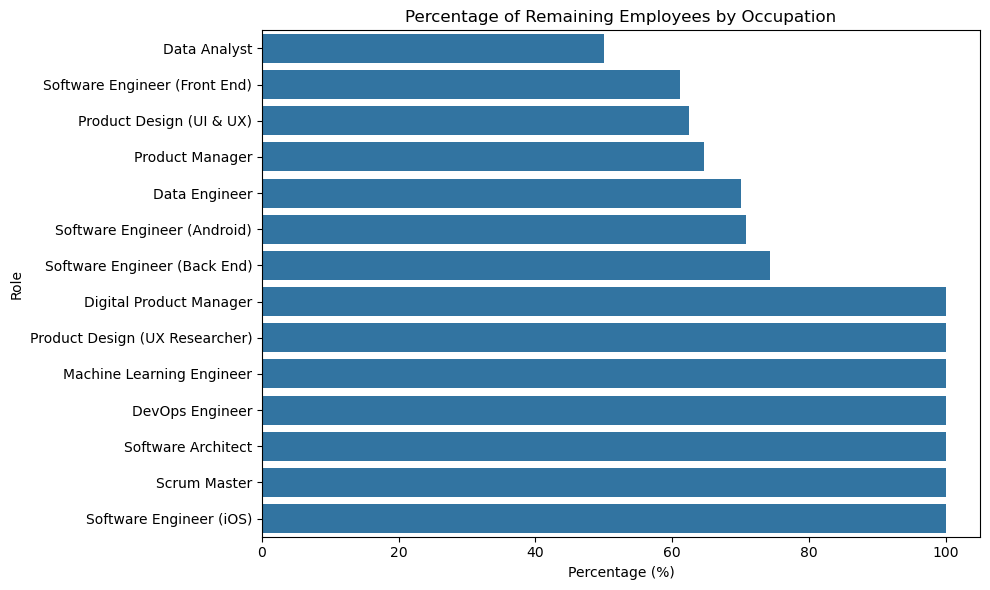

In [45]:
# Membuat Plot yang Menampilkan Persentase Employee yang Masih Ada Berdasarkan Pekerjaan
plt.figure(figsize=(10, 6))
sns.barplot(data=df_aggregated.sort_values(by='PresentaseNotResign'), y='Pekerjaan', x='PresentaseNotResign')
plt.title('Percentage of Remaining Employees by Occupation')
plt.xlabel('Percentage (%)')
plt.ylabel('Role')
plt.tight_layout()
plt.show()

Based on the visualization results, it is evident that the position with the **highest resignation rate** is **Data Analyst**, with **50% of employees having resigned**. This means that half of the employees in that role are no longer with the company, indicating a very low retention rate.

Other positions that also show relatively high resignation rates include:

* **Software Engineer (Front End)**: 40%
* **Product Designer (UI & UX)**: 37.5%
* **Product Manager**: 35.3%
* **Data Engineer**: 30%
* **Software Engineer (Android)**: 29.2%
* **Software Engineer (Back End)**: 25.7%

These high numbers suggest that strategic and technical roles are experiencing a concerning level of employee turnover. This can impact project continuity, team workload, and knowledge transfer processes.


**Findings:**
The **Data Analyst** division has the highest resignation rate (50%), followed by Front End Engineers (40%), UI/UX Designers (37.5%), and others. This indicates that **strategic and technical divisions are experiencing high employee turnover**.

**Recommendations:**

* **Conduct Structured Exit Interviews**: Create a specific exit interview format for divisions with high resignation rates. Focus on uncovering the real reasons behind resignations, which may not be formally documented.

* **Establish Clear Career Paths**: Many technical and strategic roles lack clear career progression. Provide a transparent career development and promotion roadmap.

* **Strengthen Technical Talent Retention**: Offer skill development programs, opportunities for involvement in strategic projects, and loyalty incentives for roles such as Data Analysts, Engineers, and Designers.

* **Audit Workload & Project Management**: Evaluate project management practices in technical divisions. High turnover could stem from unrealistic deadlines or imbalanced workloads.

In [46]:
# Menemukan Divisi dengan Tingkat Resign Tertinggi dan Melakukan Agregasi Berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign
# menemukan divisi dengan tingkat resign tertinggi
divisi_tertinggi = df_aggregated.loc[df_aggregated['PresentaseNotResign'].idxmin()]

# menyaring data untuk divisi dengan tingkat resign tertinggi
divisi_data = df_resign[df_resign['Pekerjaan'] == divisi_tertinggi['Pekerjaan']]

# agregasi berdasarkan jenjang karir, performa karyawan, dan alasan resign
df_aggr_divisi = divisi_data.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahResign')

df_aggr_divisi

,JenjangKarir,PerformancePegawai,AlasanResign,JumlahResign
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


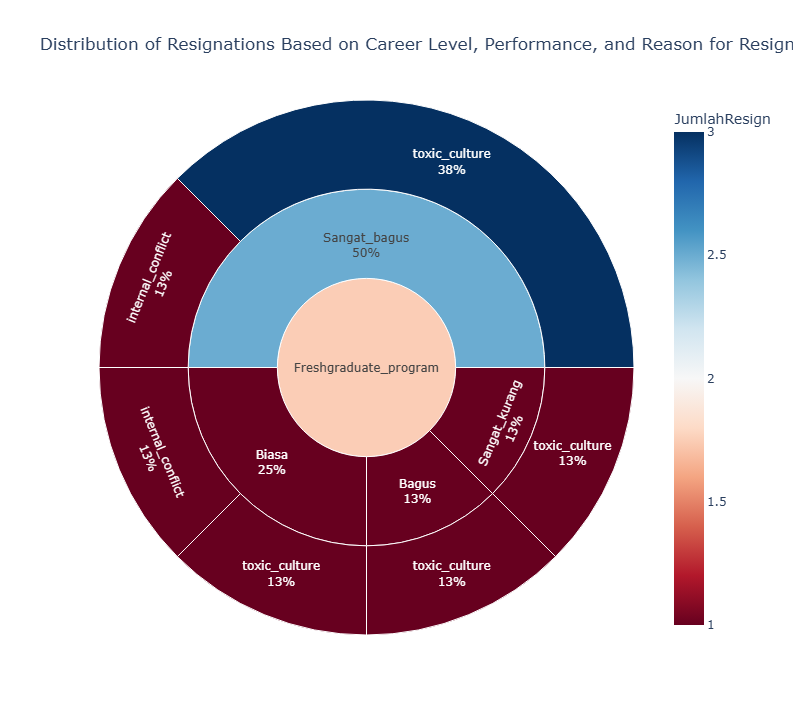

In [47]:
import plotly.express as px

fig = px.sunburst(
    df_aggr_divisi,
    path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],  # Hierarki
    values='JumlahResign',
    title=f'Distribution of Resignations Based on Career Level, Performance, and Reason for Resignation (Division: {divisi_tertinggi["Pekerjaan"]})',
    color='JumlahResign',
    color_continuous_scale='RdBu',
    width=900,
    height=700  
)

fig.update_traces(textinfo='label+percent entry')
fig.show()

**Toxic Culture Drives Top Talent to Resign: High Performance Doesn’t Guarantee Retention**

Visualization results show that the majority of employees who resigned actually came from the *high-performing* group, with the dominant reason being a **toxic work culture** (38%), followed by internal conflict (13%). In fact, toxic culture consistently appears across nearly all categories, making it the main issue driving resignation decisions. Other contributing factors, such as seeking new opportunities, work-life balance issues, and internal conflicts, are also present but to a much lesser extent.

This finding offers a crucial insight for stakeholders: **the company is losing its best employees, not the problematic ones**, and **the core issue isn’t about career progression or performance, but the work environment itself**. To prevent the continuous loss of potential talent, a thorough evaluation of workplace culture and team dynamics is an urgent step that management must take.

**Recommendations Based on Plot Results**

**Findings:**
The majority of employees who resigned had **very good performance**, and the most dominant reason was **toxic culture**, not career progression or salary. This signals that the **work environment is the root cause of the problem**.

**Recommendations:**

* **Conduct an Independent Workplace Culture Audit:** Involve a third party to carry out a workplace culture audit, including anonymous surveys and in-depth interviews to uncover toxic behaviors, team conflicts, or harmful leadership styles.

* **Leadership Training for Middle Management:** Workplace culture is heavily influenced by direct supervisors. Require soft skills and emotional intelligence training for all supervisors and team managers.

* **Establish Safe and Confidential Reporting Mechanisms:** Provide channels for reporting workplace culture issues (e.g., harassment, discrimination, intimidation) that are anonymous and protected from retaliation.

* **Build a Culture of Appreciation and Psychological Safety:** Create a work environment that values employee contributions, is safe for sharing ideas and feedback, and minimizes unproductive pressure.


**Priority Action Conclusions for Management:**

1. **Improve retention in strategic divisions** by strengthening career paths, skill development, and project management improvements.
2. **Address the root causes of work culture issues** seriously through independent audits and leadership interventions.
3. **Focus on retaining quality talent**, as they are currently the group most vulnerable to leaving the company.


# Data Cleaning for Modeling

In [48]:
df = pd.read_csv("hr_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [49]:
# drop IkutProgramLOP & PernahBekerja
df.drop(['IkutProgramLOP', 'PernahBekerja'], axis=1, inplace=True)

# imputation
imputations = {
    'AlasanResign': 'Unknown',
    'SkorKepuasanPegawai': df['SkorKepuasanPegawai'].mode()[0],
    'JumlahKeikutsertaanProjek': df['JumlahKeikutsertaanProjek'].median(),
    'JumlahKeterlambatanSebulanTerakhir': df['JumlahKeterlambatanSebulanTerakhir'].median(),
    'JumlahKetidakhadiran': df['JumlahKetidakhadiran'].median()
}

df.fillna(imputations, inplace=True)

# replace '-' dengan nilai 'Lainnya' pada kolom StatusPernikahan
df['StatusPernikahan'] = df['StatusPernikahan'].replace({'-': 'Lainnya'})

During the data cleaning process, the `LOPProgramParticipation` feature was removed due to the majority of its values being missing, making it uninformative for the model. Other features such as `Username`, `EnterpriseID`, `PhoneNumber`, `Email`, and `ResignationReason` were also removed. For numerical features like `ProjectParticipationCount`, `LateCountLastMonth`, and `AbsenteeismCount`, imputation was done using the **median** due to their **skewed** distribution, in order to prevent extreme values from affecting the imputation. Meanwhile, categorical features with missing values were imputed using the **mode** (the most frequently occurring value) of each respective column. In addition, the `ResignationReason` and `ResignationDate` features were removed to prevent **data leakage**, as this information is only available after the employee has actually resigned and should not be used in the prediction process.

In [50]:
# Drop unecessary & leakage columns
unecessary_cols = ['Username', 'EnterpriseID', 'NomorHP', 'Email', 'AlasanResign'] 

df.drop(unecessary_cols, axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 287 non-null    float64
 10  JumlahKeikutsertaanProjek           287 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

# Feature Engineering

In [52]:
# Buat Target Variable (Attrition)
df['TanggalResign'] = df['TanggalResign'].replace({'-':np.nan})
df['Attrition'] = df['TanggalResign'].notnull().astype(int)

# Ubah Tipe Data Tanggal Menjadi Datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'], errors='coerce')
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'], errors='coerce')
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'], errors='coerce')

# Fitur Baru dari Data Tanggal
df['Usia'] = (pd.to_datetime('today') - df['TanggalLahir']).dt.days // 365  #Usia Karyawan
df['LamaBekerja'] = (pd.to_datetime('today') - df['TanggalHiring']).dt.days // 365 #Lama Bekerja (dalam tahun)
df['BulanSejakPenilaian'] = ((pd.to_datetime('today') - df['TanggalPenilaianKaryawan']) / pd.Timedelta(days=30)).astype(int) #Waktu Sejak Penilaian Terakhir (bulan)

# Fitur Agregat & Behavioral
df['AktifScore'] = df['JumlahKeikutsertaanProjek'] - df['JumlahKetidakhadiran'] #Keaktifan Karyawan
df['SkorGabungan'] = df['SkorSurveyEngagement'] * 0.6 + df['SkorKepuasanPegawai'] * 0.4 #Skor Engagement & Kepuasan Pegawai

# Drop fitur2 yg tidak lagi relevan
df.drop(['TanggalResign', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 
         'JumlahKeikutsertaanProjek', 'JumlahKetidakhadiran',
        'SkorSurveyEngagement', 'SkorKepuasanPegawai'], axis=1, inplace=True)

# show
df.sample(5)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,JumlahKeterlambatanSebulanTerakhir,TingkatPendidikan,Attrition,Usia,LamaBekerja,BulanSejakPenilaian,AktifScore,SkorGabungan
151,Lainnya,Pria,FullTime,Software Engineer (Front End),Mid_level,Sangat_bagus,Jakarta Barat,Google_Search,0.0,Sarjana,1,41,13,68,-1.0,3.4
16,Menikah,Pria,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Pusat,Diversity_Job_Fair,0.0,Sarjana,0,48,13,69,-12.0,3.4
129,Lainnya,Pria,FullTime,Software Engineer (Android),Freshgraduate_program,Sangat_kurang,Jakarta Timur,LinkedIn,0.0,Magister,1,46,13,68,-6.0,4.0
229,Belum_menikah,Wanita,FullTime,Data Analyst,Mid_level,Sangat_bagus,Jakarta Barat,Indeed,0.0,Sarjana,0,37,17,70,-15.0,4.4
44,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Barat,LinkedIn,5.0,Magister,0,46,14,102,-16.0,1.8


In this feature engineering process, the target variable `Attrition` was created based on the presence of a value in the `ResignationDate` column, where employees with a resignation date are considered to have resigned (1), and the rest are considered not resigned (0). Next, date data such as `DateOfBirth`, `HiringDate`, and `EmployeeEvaluationDate` were converted to datetime format, then used to create new features: `Age` (employee age), `YearsWorked` (duration of employment in years), and `MonthsSinceEvaluation` (number of months since the last evaluation). To capture employee behavior, the feature `ActiveScore` was created as the difference between project participation and absenteeism, as well as `CombinedScore` as a weighted combination of engagement and employee satisfaction scores, with weights of 60% and 40%, respectively. After the new features were created, several original columns that were no longer relevant or represented by the new features were removed to simplify the data and avoid redundancy.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   JumlahKeterlambatanSebulanTerakhir  287 non-null    float64
 9   TingkatPendidikan                   287 non-null    object 
 10  Attrition                           287 non-null    int64  
 11  Usia                                287 non-n

# Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Kategorikan features berdasarkan tipe datanya
numerical_cols = ['JumlahKeterlambatanSebulanTerakhir', 'Usia', 'LamaBekerja', 'BulanSejakPenilaian', 'AktifScore', 'SkorGabungan']
ordinal_cols = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']
ordinal_categories = [
    ['Freshgraduate_program', 'Mid_level', 'Senior_level'],
    ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
    ['Sarjana', 'Magister', 'Doktor']
]
nominal_cols = ['JenisKelamin', 'StatusPernikahan', 'Pekerjaan', 'StatusKepegawaian', 'AsalDaerah', 'HiringPlatform']

# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('scale', RobustScaler(), numerical_cols),
    ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom_enc', OneHotEncoder(drop='first', sparse_output=False), nominal_cols)
]).set_output(transform='pandas')

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Check output
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed.sample(5)

,scale__JumlahKeterlambatanSebulanTerakhir,scale__Usia,scale__LamaBekerja,scale__BulanSejakPenilaian,scale__AktifScore,scale__SkorGabungan,ord_enc__JenjangKarir,ord_enc__PerformancePegawai,ord_enc__TingkatPendidikan,nom_enc__JenisKelamin_Wanita,nom_enc__StatusPernikahan_Bercerai,nom_enc__StatusPernikahan_Lainnya,nom_enc__StatusPernikahan_Menikah,nom_enc__Pekerjaan_Data Engineer,nom_enc__Pekerjaan_DevOps Engineer,nom_enc__Pekerjaan_Digital Product Manager,nom_enc__Pekerjaan_Machine Learning Engineer,nom_enc__Pekerjaan_Product Design (UI & UX),nom_enc__Pekerjaan_Product Design (UX Researcher),nom_enc__Pekerjaan_Product Manager,nom_enc__Pekerjaan_Scrum Master,nom_enc__Pekerjaan_Software Architect,nom_enc__Pekerjaan_Software Engineer (Android),nom_enc__Pekerjaan_Software Engineer (Back End),nom_enc__Pekerjaan_Software Engineer (Front End),nom_enc__Pekerjaan_Software Engineer (iOS),nom_enc__StatusKepegawaian_Internship,nom_enc__StatusKepegawaian_Outsource,nom_enc__AsalDaerah_Jakarta Pusat,nom_enc__AsalDaerah_Jakarta Selatan,nom_enc__AsalDaerah_Jakarta Timur,nom_enc__AsalDaerah_Jakarta Utara,nom_enc__HiringPlatform_Diversity_Job_Fair,nom_enc__HiringPlatform_Employee_Referral,nom_enc__HiringPlatform_Google_Search,nom_enc__HiringPlatform_Indeed,nom_enc__HiringPlatform_LinkedIn,nom_enc__HiringPlatform_On-line_Web_application,nom_enc__HiringPlatform_Other,nom_enc__HiringPlatform_Website
171,6.0,-0.416667,0.666667,2.147059,0.285714,-1.75,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
90,2.0,-0.666667,-1.666667,-0.029412,0.952381,0.00,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
268,0.0,-0.666667,0.666667,2.382353,0.571429,-1.25,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61,0.0,0.916667,0.666667,0.000000,-1.047619,0.50,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,-0.083333,0.333333,-0.029412,-0.952381,1.25,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   scale__JumlahKeterlambatanSebulanTerakhir          287 non-null    float64
 1   scale__Usia                                        287 non-null    float64
 2   scale__LamaBekerja                                 287 non-null    float64
 3   scale__BulanSejakPenilaian                         287 non-null    float64
 4   scale__AktifScore                                  287 non-null    float64
 5   scale__SkorGabungan                                287 non-null    float64
 6   ord_enc__JenjangKarir                              287 non-null    float64
 7   ord_enc__PerformancePegawai                        287 non-null    float64
 8   ord_enc__TingkatPendidikan                         287 non-null    float64
 9   nom_enc__J

In this preprocessing stage, features are categorized based on their data types to be processed with appropriate methods. Numerical features such as `LateCountLastMonth`, `Age`, `YearsWorked`, and others are transformed using **RobustScaler** to be more resistant to outliers. Ordinal features like `CareerLevel`, `EmployeePerformance`, and `EducationLevel` are encoded using **OrdinalEncoder** with logically predetermined category orders. Meanwhile, nominal features such as `Gender`, `MaritalStatus`, `JobRole`, and others are converted into numerical representations using **OneHotEncoder**, with the option `drop='first'` to avoid the dummy variable trap. All these transformations are combined into a **ColumnTransformer** to be applied simultaneously, and the final output is returned as a pandas DataFrame ready for model training.

# Data Sampling

In [15]:
df['Attrition'].value_counts()

Attrition
0    198
1     89
Name: count, dtype: int64

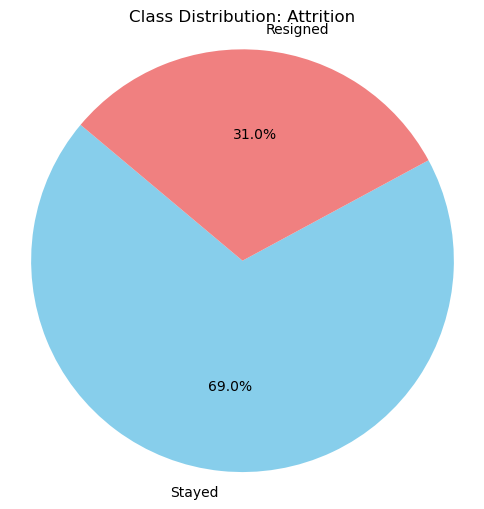

In [16]:
# Count class distribution
labels = ['Stayed', 'Resigned']
sizes = df['Attrition'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution: Attrition')
plt.axis('equal')
plt.show()

Because the class distribution in this dataset is imbalanced, with only about 31% of employees resigning compared to 69% who do not, a **data sampling** process is needed to help the model learn patterns more effectively. In this stage, I will test several data balancing methods, such as oversampling and undersampling, then select the method that yields the highest **F2 score**, considering the primary focus is to minimize failures in detecting employees who are truly going to resign (early warning system).

In [17]:
from sklearn.linear_model import LogisticRegression

# Kategorikan features berdasarkan tipe datanya
numerical_cols = ['JumlahKeterlambatanSebulanTerakhir', 'Usia', 'LamaBekerja', 'BulanSejakPenilaian', 'AktifScore', 'SkorGabungan']
ordinal_cols = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']
ordinal_categories = [
    ['Freshgraduate_program', 'Mid_level', 'Senior_level'],
    ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
    ['Sarjana', 'Magister', 'Doktor']
]
nominal_cols = ['JenisKelamin', 'StatusPernikahan', 'Pekerjaan', 'StatusKepegawaian', 'AsalDaerah', 'HiringPlatform']

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('scale', RobustScaler(), numerical_cols),
    ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom_enc', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
])

# Pipeline
model = LogisticRegression(max_iter=1000, random_state=42)
pipelines, names = get_sampling_pipelines_with_preprocessing(
    model=model,
    preprocessor=preprocessor
)

results = []

for pipe, name in zip(pipelines, names):
    summary_df = evaluate_classifier_with_sampling(X, y, pipe, scoring=['precision', 'recall', 'f1', 'f2', 'roc_auc'], sort_scoring='f2')
    summary_df.insert(0, 'Sampling Method', name)
    results.append(summary_df)

final_results = pd.concat(results, ignore_index=True).sort_values(by='f2', ascending=False)
final_results

,Sampling Method,precision,recall,f1,f2,roc_auc
12,SMOTEENN,0.310 ± 0.027,0.744 ± 0.139,0.436 ± 0.047,0.579 ± 0.082,0.511 ± 0.114
9,AllKNN,0.278 ± 0.108,0.675 ± 0.258,0.393 ± 0.151,0.524 ± 0.200,0.489 ± 0.105
7,EditedNearestNeighbours,0.322 ± 0.059,0.574 ± 0.112,0.411 ± 0.074,0.495 ± 0.091,0.510 ± 0.083
8,RepeatedEditedNearestNeighbours,0.299 ± 0.051,0.565 ± 0.229,0.376 ± 0.098,0.465 ± 0.153,0.502 ± 0.070
5,RandomUnderSampler,0.310 ± 0.096,0.475 ± 0.161,0.373 ± 0.116,0.427 ± 0.137,0.493 ± 0.119
10,NeighbourhoodCleaningRule,0.306 ± 0.056,0.463 ± 0.130,0.365 ± 0.077,0.417 ± 0.103,0.487 ± 0.102
11,InstanceHardnessThreshold,0.284 ± 0.084,0.474 ± 0.161,0.353 ± 0.107,0.415 ± 0.133,0.488 ± 0.098
2,SMOTE,0.310 ± 0.103,0.440 ± 0.151,0.362 ± 0.120,0.405 ± 0.135,0.492 ± 0.126
3,BorderlineSMOTE,0.315 ± 0.092,0.418 ± 0.149,0.357 ± 0.113,0.391 ± 0.132,0.505 ± 0.106
13,SMOTETomek,0.292 ± 0.119,0.407 ± 0.183,0.338 ± 0.142,0.375 ± 0.164,0.491 ± 0.127


The experimental results show that the data sampling method **SMOTEENN** delivers the best performance compared to other methods, with an **F2 score of 0.579**, **recall of 0.744**, and **ROC AUC of 0.511**. Considering the primary focus is to maximize detection of employees who will resign (recall) while maintaining a balanced penalty through the F2 score, **SMOTEENN is selected as the sampling method to be used in the next stage of model training**.


# Model Selection

In [18]:
# Kategorikan features berdasarkan tipe datanya
numerical_cols = ['JumlahKeterlambatanSebulanTerakhir', 'Usia', 'LamaBekerja', 'BulanSejakPenilaian', 'AktifScore', 'SkorGabungan']
ordinal_cols = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']
ordinal_categories = [
    ['Freshgraduate_program', 'Mid_level', 'Senior_level'],
    ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
    ['Sarjana', 'Magister', 'Doktor']
]
nominal_cols = ['JenisKelamin', 'StatusPernikahan', 'Pekerjaan', 'StatusKepegawaian', 'AsalDaerah', 'HiringPlatform']

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('scale', RobustScaler(), numerical_cols),
    ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom_enc', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
])

# Sampling Method
sampler = SMOTEENN(random_state=42)

# Get models list
models, names = get_classifiers()

# === Evaluate All Models ===
models, names = get_classifiers()
results, df_results, metric_scores = evaluate_classifiers(
    X=X,
    y=y,
    preprocessor=preprocessor,
    sampler=sampler,
    models=models,
    names=names,
    sort_by='F2-score (mean)'
)

# Dataframe Result
df_results

> LogReg | F1: 0.4273 | F2: 0.5728 | Precision: 0.3011 | Recall: 0.7444 | ROC-AUC: 0.4897
> KNN | F1: 0.4547 | F2: 0.6389 | Precision: 0.3074 | Recall: 0.8773 | ROC-AUC: 0.4763
> DecisionTree | F1: 0.3973 | F2: 0.4923 | Precision: 0.3025 | Recall: 0.5889 | ROC-AUC: 0.4936
> RandomForest | F1: 0.4154 | F2: 0.5366 | Precision: 0.3032 | Recall: 0.6699 | ROC-AUC: 0.5026
> ExtraTrees | F1: 0.4182 | F2: 0.5329 | Precision: 0.31 | Recall: 0.6569 | ROC-AUC: 0.5017
> GradientBoost | F1: 0.4048 | F2: 0.5091 | Precision: 0.3034 | Recall: 0.6181 | ROC-AUC: 0.4947
> AdaBoost | F1: 0.4155 | F2: 0.5275 | Precision: 0.3093 | Recall: 0.6477 | ROC-AUC: 0.5129
> XGBoost | F1: 0.4315 | F2: 0.538 | Precision: 0.3267 | Recall: 0.6481 | ROC-AUC: 0.5341
> LightGBM | F1: 0.4072 | F2: 0.5062 | Precision: 0.3105 | Recall: 0.6102 | ROC-AUC: 0.5003
> SVM | F1: 0.4242 | F2: 0.5903 | Precision: 0.2895 | Recall: 0.8028 | ROC-AUC: 0.4363
> MLP | F1: 0.4197 | F2: 0.535 | Precision: 0.3105 | Recall: 0.6593 | ROC-AUC: 0.

,F1-score (mean),F2-score (mean),Precision (mean),Recall (mean),ROC-AUC (mean)
KNN,0.4547,0.6389,0.3074,0.8773,0.4763
SVM,0.4242,0.5903,0.2895,0.8028,0.4363
LogReg,0.4273,0.5728,0.3011,0.7444,0.4897
CatBoost,0.4293,0.5689,0.3062,0.7306,0.5081
Ridge,0.4189,0.5532,0.2996,0.7083,0.4869
XGBoost,0.4315,0.5380,0.3267,0.6481,0.5341
RandomForest,0.4154,0.5366,0.3032,0.6699,0.5026
MLP,0.4197,0.5350,0.3105,0.6593,0.4934
ExtraTrees,0.4182,0.5329,0.3100,0.6569,0.5017
AdaBoost,0.4155,0.5275,0.3093,0.6477,0.5129


**KNN showed the best performance in detecting employees who will resign, with the highest F2-score of 0.6389**, outperforming the other tested models. The second-best position was held by **SVM**, with an F2-score of 0.5903. This F2 score is important because it places greater weight on recall, which is highly relevant in the context of attrition prediction, where failing to identify potential resignations (false negatives) is far more costly than false positives.

For the next step, I will perform **hyperparameter tuning on the four most promising models**, namely:

1. **KNN** – due to its highest recall and F2 scores,
2. **SVM**,
3. **Logistic Regression**,
4. **XGBoost**, and
5. **CatBoost** – because they demonstrate a good combination of recall and F2-score.

The best model will be selected based on the combination of the **highest F2-score and ROC-AUC**, to not only recognize as many potential resignations as possible but also maintain good overall classification accuracy.

# Hyperparameter Tuning

In [19]:
tuning_results = {}

## `KNN`

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split for more robust evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define features
numerical_cols = ['JumlahKeterlambatanSebulanTerakhir', 'Usia', 'LamaBekerja', 'BulanSejakPenilaian', 'AktifScore', 'SkorGabungan']
ordinal_cols = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']
ordinal_categories = [
    ['Freshgraduate_program', 'Mid_level', 'Senior_level'],
    ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
    ['Sarjana', 'Magister', 'Doktor']
]
nominal_cols = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('scale', RobustScaler(), numerical_cols),
    ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom_enc', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
])

# Scoring
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)
scoring = {'F2': f2_scorer, 'ROC-AUC': 'roc_auc'}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model & Params
model = KNeighborsClassifier(n_jobs=-1)
params = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# Sampling
sampler = SMOTEENN(random_state=42)

# Pipeline
pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('classifier', model)
])

# GridSearchCV setup
grid = GridSearchCV(
    pipe,
    param_grid=params,
    scoring=scoring,
    refit='F2',
    cv=cv,
    n_jobs=-1,
    error_score='raise',
    verbose=1
)

# Tune
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
0.6749145652905291


F2-score:  0.6641
F1-score:  0.4595
Precision:  0.3036
Recall:     0.9444
ROC AUC Score: 0.3868
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.05        40
           1       0.30      0.94      0.46        18

    accuracy                           0.31        58
   macro avg       0.40      0.48      0.25        58
weighted avg       0.44      0.31      0.18        58



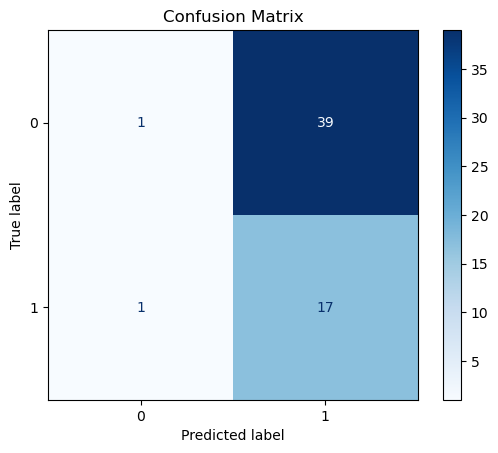

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, precision_score, f1_score, recall_score, roc_auc_score

# Make prediction on X_test
y_pred = grid.best_estimator_.predict(X_test)
y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate scores
f1 = f1_score(y_test, y_pred, pos_label=1)
f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_proba)

# Print scores
print(f"F2-score:  {f2:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.best_estimator_.named_steps['classifier'].classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Save result
tuning_results['KNN'] = {}
tuning_results['KNN']['Best Parameters'] = grid.best_params_
tuning_results['KNN']['Best Score'] = grid.best_score_
tuning_results['KNN']['F1'] = f1
tuning_results['KNN']['F2'] = f2
tuning_results['KNN']['ROC-AUC'] = roc_auc
tuning_results['KNN']['Precision'] = precision
tuning_results['KNN']['Recall'] = recall

print(tuning_results)

{'KNN': {'Best Parameters': {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}, 'Best Score': np.float64(0.6749145652905291), 'F1': 0.4594594594594595, 'F2': 0.6640625, 'ROC-AUC': 0.3868055555555555, 'Precision': 0.30357142857142855, 'Recall': 0.9444444444444444}}


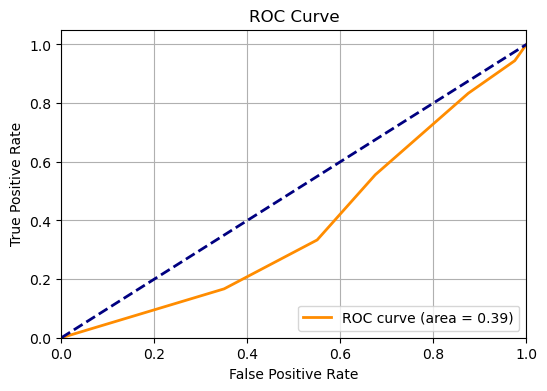

In [23]:
from sklearn.metrics import roc_curve, auc

y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## `SVM`

In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split for more robust evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define features
numerical_cols = ['JumlahKeterlambatanSebulanTerakhir', 'Usia', 'LamaBekerja', 'BulanSejakPenilaian', 'AktifScore', 'SkorGabungan']
ordinal_cols = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']
ordinal_categories = [
    ['Freshgraduate_program', 'Mid_level', 'Senior_level'],
    ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
    ['Sarjana', 'Magister', 'Doktor']
]
nominal_cols = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform']  # Contoh

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('scale', RobustScaler(), numerical_cols),
    ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom_enc', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
])

# Scoring
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)
scoring = {'F2': f2_scorer, 'ROC-AUC': 'roc_auc'}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model & Params
model = SVC(probability=True, random_state=42)
params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

# Sampling
sampler = SMOTEENN(random_state=42)

# Pipeline
pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('classifier', model)
])

# GridSearchCV setup
grid = GridSearchCV(
    pipe,
    param_grid=params,
    scoring=scoring,
    refit='F2',
    cv=cv,
    n_jobs=-1,
    error_score='raise',
    verbose=1
)

# Tune
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
0.6918880012307556


F2-score:  0.6923
Precision:  0.3103
Recall:     1.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.31      1.00      0.47        18

    accuracy                           0.31        58
   macro avg       0.16      0.50      0.24        58
weighted avg       0.10      0.31      0.15        58



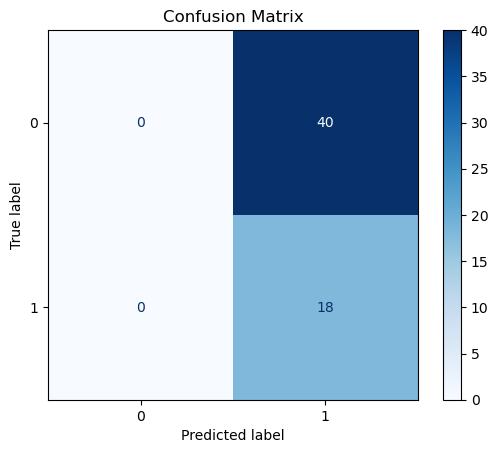

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, precision_score, recall_score

# Make prediction on X_test
y_pred = grid.best_estimator_.predict(X_test)

# Calculate scores
f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

# Print scores
print(f"F2-score:  {f2:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.best_estimator_.named_steps['classifier'].classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Save result
tuning_results['SVM'] = {}
tuning_results['SVM']['Best Parameters'] = grid.best_params_
tuning_results['SVM']['Best Score'] = grid.best_score_
tuning_results['SVM']['F1'] = f1
tuning_results['SVM']['F2'] = f2
tuning_results['SVM']['ROC-AUC'] = roc_auc
tuning_results['SVM']['Precision'] = precision
tuning_results['SVM']['Recall'] = recall

print(tuning_results)

{'KNN': {'Best Parameters': {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}, 'Best Score': np.float64(0.6749145652905291), 'F1': 0.4594594594594595, 'F2': 0.6640625, 'ROC-AUC': 0.3868055555555555, 'Precision': 0.30357142857142855, 'Recall': 0.9444444444444444}, 'SVM': {'Best Parameters': {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}, 'Best Score': np.float64(0.6918880012307556), 'F1': 0.4594594594594595, 'F2': 0.6923076923076923, 'ROC-AUC': 0.3868055555555555, 'Precision': 0.3103448275862069, 'Recall': 1.0}}


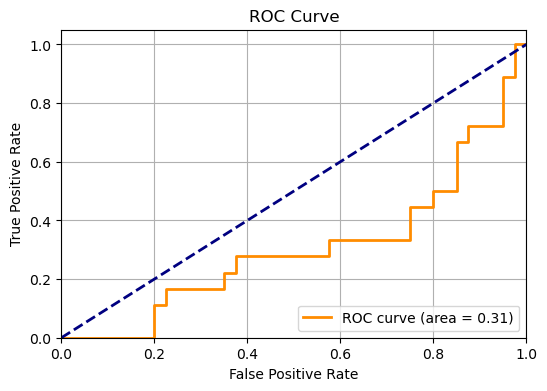

In [27]:
from sklearn.metrics import roc_curve, auc

y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## `LogReg`

In [28]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split for more robust evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define features
numerical_cols = ['JumlahKeterlambatanSebulanTerakhir', 'Usia', 'LamaBekerja', 'BulanSejakPenilaian', 'AktifScore', 'SkorGabungan']
ordinal_cols = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']
ordinal_categories = [
    ['Freshgraduate_program', 'Mid_level', 'Senior_level'],
    ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
    ['Sarjana', 'Magister', 'Doktor']
]
nominal_cols = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform']  # Contoh

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('scale', RobustScaler(), numerical_cols),
    ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom_enc', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
])

# Scoring
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)
scoring = {'F2': f2_scorer, 'ROC-AUC': 'roc_auc'}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model & Params
model = LogisticRegression(max_iter=1000, random_state=42)
params = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': [0.01, 0.1, 1.0, 10.0],
    'classifier__solver': ['saga'],  # saga supports all penalties + works with elasticnet
    'classifier__l1_ratio': [0, 0.5, 1]  # only used when penalty='elasticnet'
}

# Sampling
sampler = SMOTEENN(random_state=42)

# Pipeline
pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('classifier', model)
])

# GridSearchCV setup
grid = GridSearchCV(
    pipe,
    param_grid=params,
    scoring=scoring,
    refit='F2',
    cv=cv,
    n_jobs=-1,
    error_score='raise',
    verbose=1
)

# Tune
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'classifier__C': 0.1, 'classifier__l1_ratio': 0.5, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
0.6932469606561099


F2-score:  0.6923
Precision:  0.3103
Recall:     1.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.31      1.00      0.47        18

    accuracy                           0.31        58
   macro avg       0.16      0.50      0.24        58
weighted avg       0.10      0.31      0.15        58



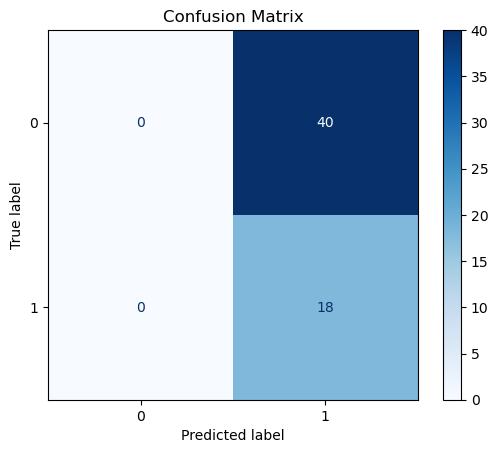

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, precision_score, recall_score

# Make prediction on X_test
y_pred = grid.best_estimator_.predict(X_test)

# Calculate scores
f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

# Print scores
print(f"F2-score:  {f2:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.best_estimator_.named_steps['classifier'].classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Save result
tuning_results['LogReg'] = {}
tuning_results['LogReg']['Best Parameters'] = grid.best_params_
tuning_results['LogReg']['Best Score'] = grid.best_score_
tuning_results['LogReg']['F1'] = f1
tuning_results['LogReg']['F2'] = f2
tuning_results['LogReg']['ROC-AUC'] = roc_auc
tuning_results['LogReg']['Precision'] = precision
tuning_results['LogReg']['Recall'] = recall

print(tuning_results)

{'KNN': {'Best Parameters': {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}, 'Best Score': np.float64(0.6749145652905291), 'F1': 0.4594594594594595, 'F2': 0.6640625, 'ROC-AUC': 0.3868055555555555, 'Precision': 0.30357142857142855, 'Recall': 0.9444444444444444}, 'SVM': {'Best Parameters': {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}, 'Best Score': np.float64(0.6918880012307556), 'F1': 0.4594594594594595, 'F2': 0.6923076923076923, 'ROC-AUC': 0.3868055555555555, 'Precision': 0.3103448275862069, 'Recall': 1.0}, 'LogReg': {'Best Parameters': {'classifier__C': 0.1, 'classifier__l1_ratio': 0.5, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}, 'Best Score': np.float64(0.6932469606561099), 'F1': 0.4594594594594595, 'F2': 0.6923076923076923, 'ROC-AUC': 0.30833333333333335, 'Precision': 0.3103448275862069, 'Recall': 1.0}}


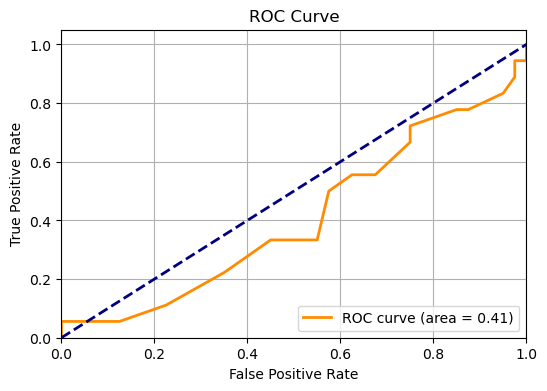

In [31]:
from sklearn.metrics import roc_curve, auc

y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## `XGBoost`

In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split for more robust evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define features
numerical_cols = ['JumlahKeterlambatanSebulanTerakhir', 'Usia', 'LamaBekerja', 'BulanSejakPenilaian', 'AktifScore', 'SkorGabungan']
ordinal_cols = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']
ordinal_categories = [
    ['Freshgraduate_program', 'Mid_level', 'Senior_level'],
    ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
    ['Sarjana', 'Magister', 'Doktor']
]
nominal_cols = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform']  # Contoh

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('scale', RobustScaler(), numerical_cols),
    ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom_enc', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
])

# Scoring
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)
scoring = {'F2': f2_scorer, 'ROC-AUC': 'roc_auc'}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model & Params
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
model =  XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
params = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.05, 0.1, 0.2]
}

# Sampling
sampler = AllKNN()

# Pipeline
pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('classifier', model)
])

# GridSearchCV setup
grid = GridSearchCV(
    pipe,
    param_grid=params,
    scoring=scoring,
    refit='F2',
    cv=cv,
    n_jobs=-1,
    error_score='raise',
    verbose=1
)

# Tune
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
0.6568862383663142


F2-score:  0.6977
F1-score:  0.4800
Precision:  0.3158
Recall:     1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        40
           1       0.32      1.00      0.48        18

    accuracy                           0.33        58
   macro avg       0.66      0.51      0.26        58
weighted avg       0.79      0.33      0.18        58



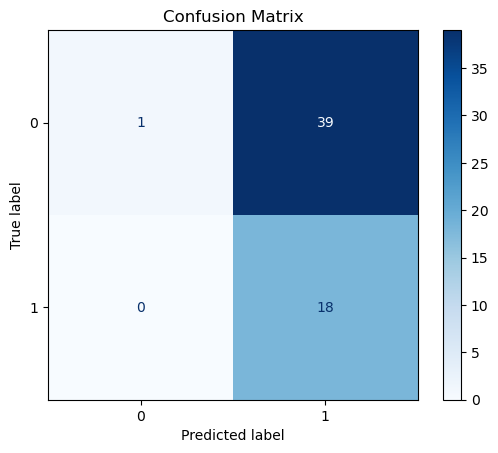

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, precision_score, recall_score, f1_score

# Make prediction on X_test
y_pred = grid.best_estimator_.predict(X_test)

# Calculate scores
f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1_score = f1_score(y_test, y_pred, pos_label=1)

# Print scores
print(f"F2-score:  {f2:.4f}")
print(f"F1-score:  {f1_score:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.best_estimator_.named_steps['classifier'].classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Save result
tuning_results['XGBoost'] = {}
tuning_results['XGBoost']['Best Parameters'] = grid.best_params_
tuning_results['XGBoost']['Best Score'] = grid.best_score_
tuning_results['XGBoost']['F1'] = f1
tuning_results['XGBoost']['F2'] = f2
tuning_results['XGBoost']['ROC-AUC'] = roc_auc
tuning_results['XGBoost']['Precision'] = precision
tuning_results['XGBoost']['Recall'] = recall

print(tuning_results)

{'KNN': {'Best Parameters': {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}, 'Best Score': np.float64(0.6749145652905291), 'F1': 0.4594594594594595, 'F2': 0.6640625, 'ROC-AUC': 0.3868055555555555, 'Precision': 0.30357142857142855, 'Recall': 0.9444444444444444}, 'SVM': {'Best Parameters': {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}, 'Best Score': np.float64(0.6918880012307556), 'F1': 0.4594594594594595, 'F2': 0.6923076923076923, 'ROC-AUC': 0.3868055555555555, 'Precision': 0.3103448275862069, 'Recall': 1.0}, 'LogReg': {'Best Parameters': {'classifier__C': 0.1, 'classifier__l1_ratio': 0.5, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}, 'Best Score': np.float64(0.6932469606561099), 'F1': 0.4594594594594595, 'F2': 0.6923076923076923, 'ROC-AUC': 0.30833333333333335, 'Precision': 0.3103448275862069, 'Recall': 1.0}, 'XGBoost': {'Best Parameters': {'classifier__learning_rate': 0.05, 'c

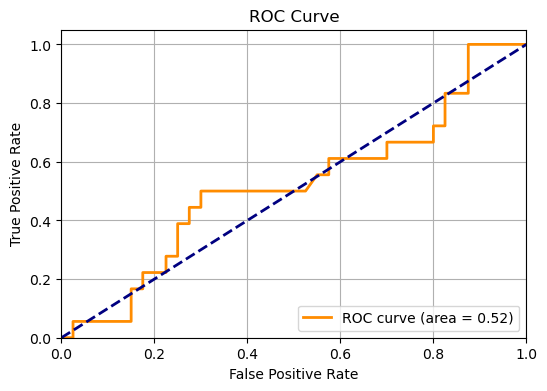

In [35]:
from sklearn.metrics import roc_curve, auc

y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## `CatBoost`

In [36]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split for more robust evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define features
numerical_cols = ['JumlahKeterlambatanSebulanTerakhir', 'Usia', 'LamaBekerja', 'BulanSejakPenilaian', 'AktifScore', 'SkorGabungan']
ordinal_cols = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']
ordinal_categories = [
    ['Freshgraduate_program', 'Mid_level', 'Senior_level'],
    ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
    ['Sarjana', 'Magister', 'Doktor']
]
nominal_cols = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform']  # Contoh

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('scale', RobustScaler(), numerical_cols),
    ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom_enc', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
])

# Scoring
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)
scoring = {'F2': f2_scorer, 'ROC-AUC': 'roc_auc'}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model & Params
class_weights = [sum(y_train == 1) / len(y_train), sum(y_train == 0) / len(y_train)]
model =  CatBoostClassifier(verbose=0, class_weights=class_weights, random_state=42)
params = {
    'classifier__iterations': [100, 200],
    'classifier__depth': [4, 6],
    'classifier__learning_rate': [0.05, 0.1]
}

# Sampling
sampler = AllKNN()

# Pipeline
pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('classifier', model)
])

# GridSearchCV setup
grid = GridSearchCV(
    pipe,
    param_grid=params,
    scoring=scoring,
    refit='F2',
    cv=cv,
    n_jobs=-1,
    error_score='raise',
    verbose=1
)

# Tune
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'classifier__depth': 4, 'classifier__iterations': 200, 'classifier__learning_rate': 0.05}
0.6922616729252957


F2-score:  0.6746
Precision:  0.3148
Recall:     0.9444
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.07      0.14        40
           1       0.31      0.94      0.47        18

    accuracy                           0.34        58
   macro avg       0.53      0.51      0.30        58
weighted avg       0.61      0.34      0.24        58



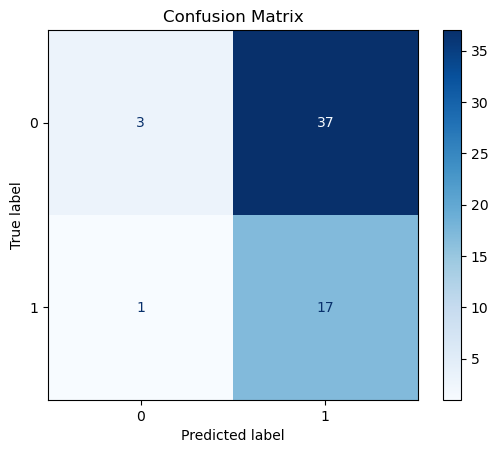

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, precision_score, recall_score

# Make prediction on X_test
y_pred = grid.best_estimator_.predict(X_test)

# Calculate scores
f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

# Print scores
print(f"F2-score:  {f2:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.best_estimator_.named_steps['classifier'].classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Save result
tuning_results['CatBoost'] = {}
tuning_results['CatBoost']['Best Parameters'] = grid.best_params_
tuning_results['CatBoost']['Best Score'] = grid.best_score_
tuning_results['CatBoost']['F1'] = f1
tuning_results['CatBoost']['F2'] = f2
tuning_results['CatBoost']['ROC-AUC'] = roc_auc
tuning_results['CatBoost']['Precision'] = precision
tuning_results['CatBoost']['Recall'] = recall

print(tuning_results)

{'KNN': {'Best Parameters': {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}, 'Best Score': np.float64(0.6749145652905291), 'F1': 0.4594594594594595, 'F2': 0.6640625, 'ROC-AUC': 0.3868055555555555, 'Precision': 0.30357142857142855, 'Recall': 0.9444444444444444}, 'SVM': {'Best Parameters': {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}, 'Best Score': np.float64(0.6918880012307556), 'F1': 0.4594594594594595, 'F2': 0.6923076923076923, 'ROC-AUC': 0.3868055555555555, 'Precision': 0.3103448275862069, 'Recall': 1.0}, 'LogReg': {'Best Parameters': {'classifier__C': 0.1, 'classifier__l1_ratio': 0.5, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}, 'Best Score': np.float64(0.6932469606561099), 'F1': 0.4594594594594595, 'F2': 0.6923076923076923, 'ROC-AUC': 0.30833333333333335, 'Precision': 0.3103448275862069, 'Recall': 1.0}, 'XGBoost': {'Best Parameters': {'classifier__learning_rate': 0.05, 'c

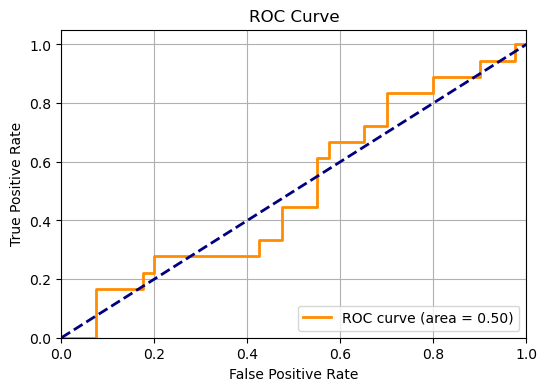

In [39]:
from sklearn.metrics import roc_curve, auc

y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [40]:
pd.DataFrame(tuning_results).T.sort_values(by='F2', ascending=False)

,Best Parameters,Best Score,F1,F2,ROC-AUC,Precision,Recall
XGBoost,"{'classifier__learning_rate': 0.05, 'classifie...",0.656886,0.459459,0.697674,0.407639,0.315789,1.0
SVM,"{'classifier__C': 0.1, 'classifier__gamma': 's...",0.691888,0.459459,0.692308,0.386806,0.310345,1.0
LogReg,"{'classifier__C': 0.1, 'classifier__l1_ratio':...",0.693247,0.459459,0.692308,0.308333,0.310345,1.0
CatBoost,"{'classifier__depth': 4, 'classifier__iteratio...",0.692262,0.459459,0.674603,0.517361,0.314815,0.944444
KNN,"{'classifier__metric': 'euclidean', 'classifie...",0.674915,0.459459,0.664062,0.386806,0.303571,0.944444


# Model Evaluation

Based on the hyperparameter tuning results of the five best models (KNN, SVM, Logistic Regression, XGBoost, and CatBoost), the **XGBoost** model demonstrated the best performance with the **highest F2-score and recall** compared to the other models. On the training data, XGBoost recorded an **F2-score of 0.6568**, while on the testing data it achieved an **F2-score of 0.6977**, **F1-score of 0.4800**, **precision of 0.3158**, and a **perfect recall of 1.0000**. Considering the primary goal is to maximize detection of employees at risk of resigning (high recall), **XGBoost was chosen as the final model to be used in the attrition prediction system**.

In [124]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, ConfusionMatrixDisplay, fbeta_score, precision_score, recall_score
import pandas as pd

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split for more robust evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define features
numerical_cols = ['JumlahKeterlambatanSebulanTerakhir', 'Usia', 'LamaBekerja', 'BulanSejakPenilaian', 'AktifScore', 'SkorGabungan']
ordinal_cols = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']
ordinal_categories = [
    ['Freshgraduate_program', 'Mid_level', 'Senior_level'],
    ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus'],
    ['Sarjana', 'Magister', 'Doktor']
]
nominal_cols = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform']  # Contoh

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('scale', RobustScaler(), numerical_cols),
    ('ord_enc', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('nom_enc', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), nominal_cols)
]).set_output(transform='pandas')

# Scoring
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)
scoring = {'F2': f2_scorer, 'ROC-AUC': 'roc_auc'}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model & Params
best_params = {'learning_rate': 0.05, 'max_depth': 3, 'cn_estimators': 50}
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
model =  XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)

# Sampling
sampler = AllKNN()

# Pipeline
pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('classifier', model)
])
cv_result = cross_val_score(pipe, X_train, y_train, scoring=f2_scorer, cv=cv)
print(f"Training Mean F2-score: {cv_result.mean()}")

Training Mean F2-score: 0.637887206164517


Testing F2-score:  0.7087
Testing Precision:  0.3273
Testing Recall:     1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.14        40
           1       0.33      1.00      0.49        18

    accuracy                           0.36        58
   macro avg       0.66      0.54      0.32        58
weighted avg       0.79      0.36      0.25        58



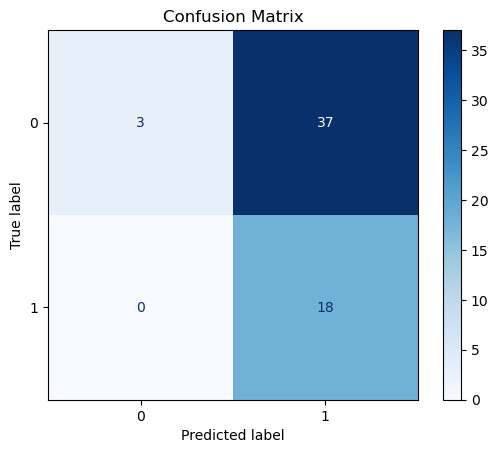

In [125]:
# Fit pipeline
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Calculate scores
f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

# Print scores
print(f"Testing F2-score:  {f2:.4f}")
print(f"Testing Precision:  {precision:.4f}")
print(f"Testing Recall:     {recall:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.named_steps['classifier'].classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix result shows that:

* Out of 18 employees who actually resigned, the model correctly predicted all of them. This means recall = 1.00 (100%) for the "resign" class.
* Out of 40 employees who did not resign, the model only correctly predicted 3 as "not resign." This means precision = 0.33 (33%) for the "not resign" prediction, or can also be seen as low accuracy for the "not resign" class.

This means the model is very good at detecting employees who will resign. None were missed; all resigning employees were detected (high recall). However, the model performs poorly in distinguishing those who will not resign. Most employees who did not resign were incorrectly predicted as resigning (high false positives).

* **Positive aspect:** This model is very effective at detecting potential resignations (which may be useful for an early warning system or HR interventions).
* **Negative aspect:** There is a high error rate for employees who do not resign. This could lead to overreactions—for example, management might believe many employees will resign when they actually won’t.

In summary, the model is highly accurate in predicting employees who will resign (100% recall) but tends to frequently misclassify employees who will stay as resigning (high false positive rate). This indicates the model focuses more on detecting potential resignations (sensitivity) but sacrifices precision in identifying employees who remain (low specificity).

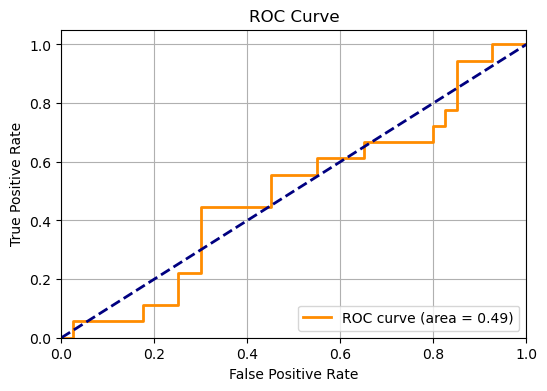

In [126]:
from sklearn.metrics import roc_curve, auc

y_proba = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Model Interpretability

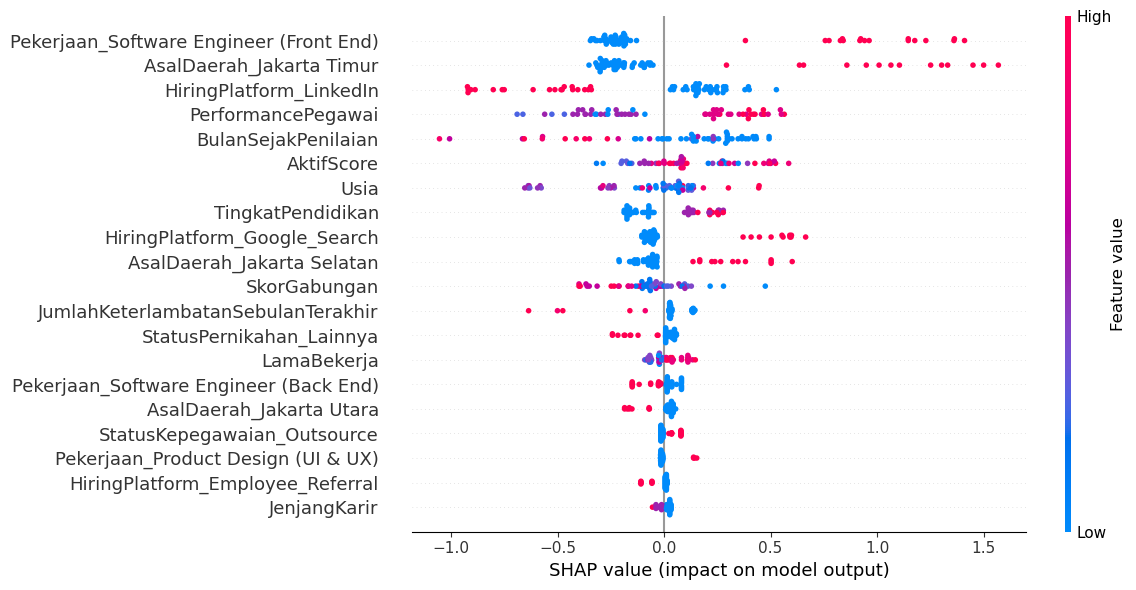

In [130]:
import shap

# Extract fitted preprocessor and classifier
fitted_preprocessor = pipe.named_steps['preprocessor']
fitted_classifier = pipe.named_steps['classifier']

# Transform X_test
X_test_transformed = fitted_preprocessor.transform(X_test)

# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(fitted_classifier)
shap_values = explainer.shap_values(X_test_transformed)
expected_value = explainer.expected_value

############## visualizations #############
# Generate summary dot plot
feat_names = X_test_transformed.columns.str.replace(r'^.*?__', '', regex=True)
shap.summary_plot(shap_values, X_test_transformed, feature_names=feat_names, title="SHAP summary plot", plot_size=(12, 6))

The analysis of the **summary plot** shows that the most influential factor in predicting employee resignation is **the role of Software Engineer (Front End)**. From the SHAP value distribution, it can be seen that holding the position of Front End Engineer tends to increase the risk of resignation (many red points appear on the right side).

Next, **Region of Origin (East Jakarta)** and the **LinkedIn recruitment platform** are also important factors. Employees from East Jakarta or recruited via LinkedIn appear more prone to resign compared to other groups. This may indicate certain demographic characteristics or more active job-seeking behavior among them.

Other notable factors include **Employee Performance** and **Months Since Last Evaluation**. High performance scores often appear on the right side of the plot (positive SHAP values), meaning high-performing employees are at greater risk of resignation—possibly because their expectations are not being met. Meanwhile, the longer the time since the last evaluation, the higher the tendency to resign, indicating that the frequency of evaluation and feedback plays a crucial role in retention.

Additionally, **ActiveScore** (employee activity level) also appears relevant. Low scores (blue) tend to increase attrition risk, meaning lack of activity could be an early indicator of employees likely to resign.

**Business implications:**

* **Retention focus:** Special attention is needed for **Front End Engineers** and employees recruited from **LinkedIn**, as these groups are more vulnerable to resigning.
* **Evaluation & feedback:** Increase the frequency of performance evaluations to reduce feelings of neglect.
* **Monitor high performers:** Develop special engagement programs for high-performing employees to prevent turnover.
* **Early warning system:** Use activity indicators (ActiveScore) as early signals for retention interventions.

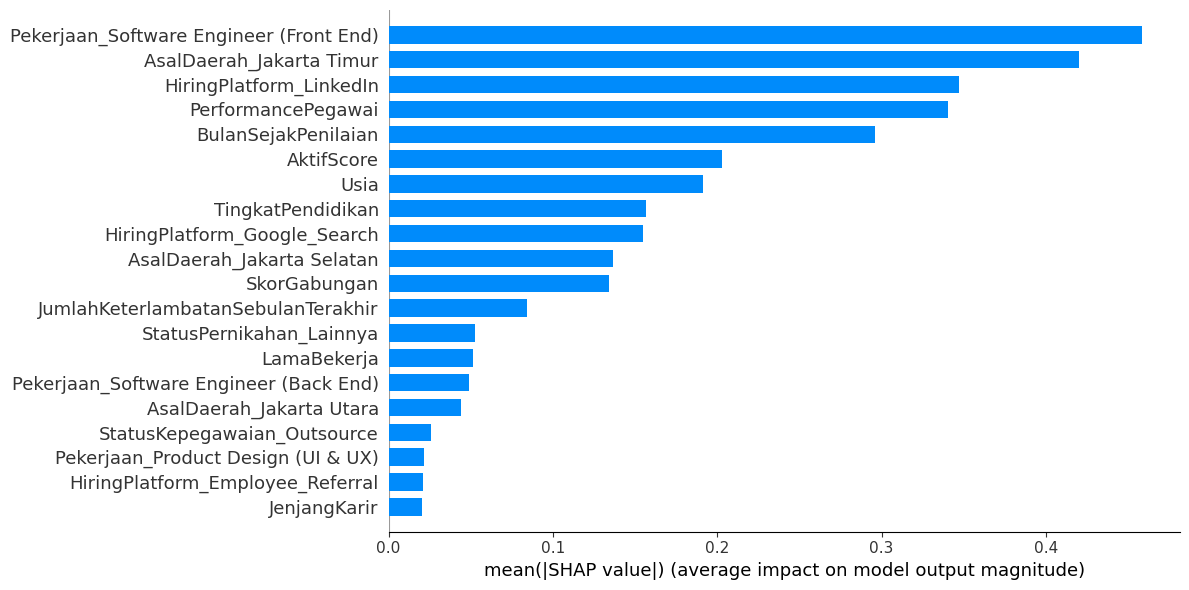

In [134]:
# Generate summary bar plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=feat_names, plot_type="bar", plot_size=(12, 6)) 

In [176]:
print("Informasi Karyawan:")
print("-----------")
print(X_test.loc[68, :])
print("-----------")
print(X_test_transformed.loc[68, :])

Informasi Karyawan:
-----------
StatusPernikahan                                            Lainnya
JenisKelamin                                                 Wanita
StatusKepegawaian                                          FullTime
Pekerjaan                             Software Engineer (Front End)
JenjangKarir                                              Mid_level
PerformancePegawai                                            Biasa
AsalDaerah                                          Jakarta Selatan
HiringPlatform                                               Indeed
JumlahKeterlambatanSebulanTerakhir                              0.0
TingkatPendidikan                                            Doktor
Usia                                                             46
LamaBekerja                                                      12
BulanSejakPenilaian                                              69
AktifScore                                                     -6.0
SkorGabungan    

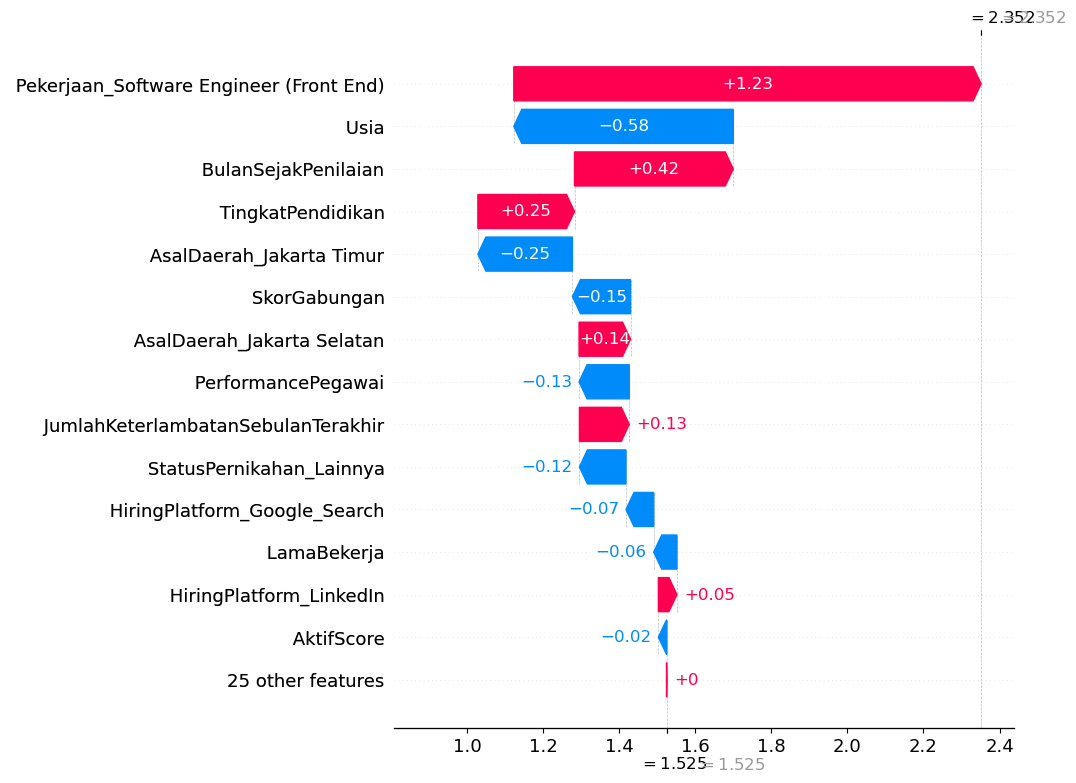

In [177]:
# Generate waterfall plot
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[0], features=X_test_transformed.loc[68,:], feature_names=feat_names, max_display=15, show=True)

# Recommendation

1. **Focus on Front End Engineers and Young Talent**
   The Software Engineer (Front End) position and younger employees show a high risk of resignation. The company needs to provide clear career paths, technical mentoring, and balanced workloads to improve retention.

2. **Accelerate Performance Review Cycles and Career Development**
   Features like MonthsSinceLastEvaluation and higher EducationLevel indicate that lack of feedback and career growth drive resignation desires. Implement quarterly performance reviews with constructive feedback, and offer opportunities to lead projects or internal promotions for high-performing or well-educated employees.

3. **Implement Interventions Based on Location and Performance**
   Resignation risk varies geographically, especially in South Jakarta. Conduct location-based surveys or focus group discussions to understand challenges such as living costs or transportation, and consider flexible work arrangements. Additionally, monitor metrics like EmployeePerformance and NumberOfDelays to detect early risk—provide mentoring for underperformers and challenging tasks or incentives for top performers.